# Darknet Economics - Sellers - Data Processing and Feature Engineering

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
import utils
from bs4 import BeautifulSoup

import nltk

In [2]:
sellers16 = pd.read_csv('data/DreamMarket2016_seller.csv')
sellers17 = pd.read_csv('data/DreamMarket2017_seller.csv')

## User-defined Functions

In [21]:
def convert_str_to_float(string):
    '''
    Transforms a string to a float.
    If string can
    
    Args:
        string (str) : Price is expected to start w/ a "$".
    
    Returns:
        adj_price (float) : Float object to be used for calculations/modelinng.
    
    '''

    try:
        
        if string.isnumeric():
            num_val = string
        
        else:
            tmp = re.sub(r'[^0-9.]', '', string)
            num_val = float(tmp)
                     
    except:
        num_val = np.NaN
    
    return num_val


## Raw Data

### 2016

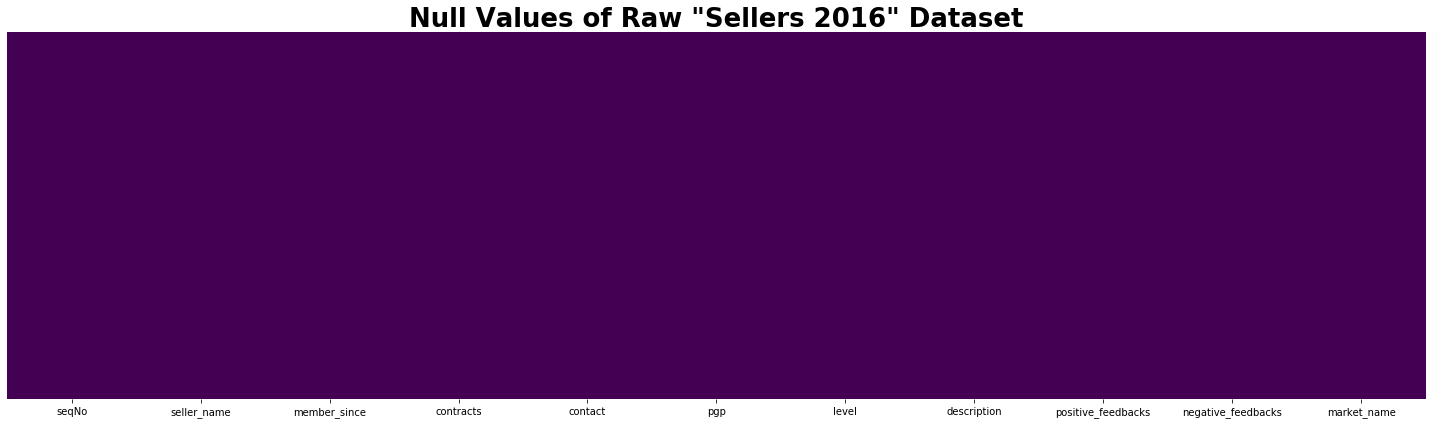

In [4]:
utils.plot_null_val_heatmap(sellers16, 'Null Values of Raw "Sellers 2016" Dataset', (20,6))

In [8]:
sellers16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   seqNo               690 non-null    int64 
 1   seller_name         690 non-null    object
 2   member_since        690 non-null    object
 3   contracts           690 non-null    object
 4   contact             690 non-null    object
 5   pgp                 690 non-null    object
 6   level               690 non-null    object
 7   description         690 non-null    object
 8   positive_feedbacks  690 non-null    object
 9   negative_feedbacks  690 non-null    object
 10  market_name         690 non-null    object
dtypes: int64(1), object(10)
memory usage: 59.4+ KB


In [10]:
sellers16.head()

,seqNo,seller_name,member_since,contracts,contact,pgp,level,description,positive_feedbacks,negative_feedbacks,market_name
0,1,0ldamsterdam,13/07/2016,-,-,-----BEGIN PGP PUBLIC KEY BLOCK-----\nVersion:...,-,\n-.-.-.-. OLDAMSTERDAM -.-.-.-.\n\nwe ship on...,4.83,-,Dream
1,2,2good4DN,09/05/2016,-,-,-----BEGIN PGP PUBLIC KEY BLOCK-----\n\nmQENBF...,-,\nWe are determined to offer even better produ...,4.76,-,Dream
2,3,420BLAZEUP,19/09/2016,-,-,-----BEGIN PGP PUBLIC KEY BLOCK-----\n\nmQINBF...,-,\n 420BLAZEUP \n\nWE ARE HE...,4.88,-,Dream
3,4,420BooBooKittyfk69,12/07/2016,-,-,-----BEGIN PGP PUBLIC KEY BLOCK-----\n\nmQINBF...,-,"\nRunning low on stock, if u are interested in...",4.85,-,Dream
4,5,ACAB2016,15/07/2016,-,-,-----BEGIN PGP PUBLIC KEY BLOCK-----\n\nmQENBF...,-,"\nHello, we are up and running again. We can d...",4.6Â,-,Dream


In [17]:
cols_to_review = ['contracts', 'contact', 'level', 'negative_feedbacks', 'market_name']
for col in cols_to_review:
    print(sellers16[col].unique())

sellers16_v2 = sellers16.drop(cols_to_review, axis=1)

['-']
['-']
['-']
['-']
['Dream']


In [22]:
sellers16_v2['feedback_cleaned'] = sellers16_v2['positive_feedbacks'].apply(lambda x: convert_str_to_float(x))

In [64]:
sellers16_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   seqNo               690 non-null    int64  
 1   seller_name         690 non-null    object 
 2   member_since        690 non-null    object 
 3   pgp                 690 non-null    object 
 4   description         690 non-null    object 
 5   positive_feedbacks  690 non-null    object 
 6   feedback_cleaned    690 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 37.9+ KB


### 2017

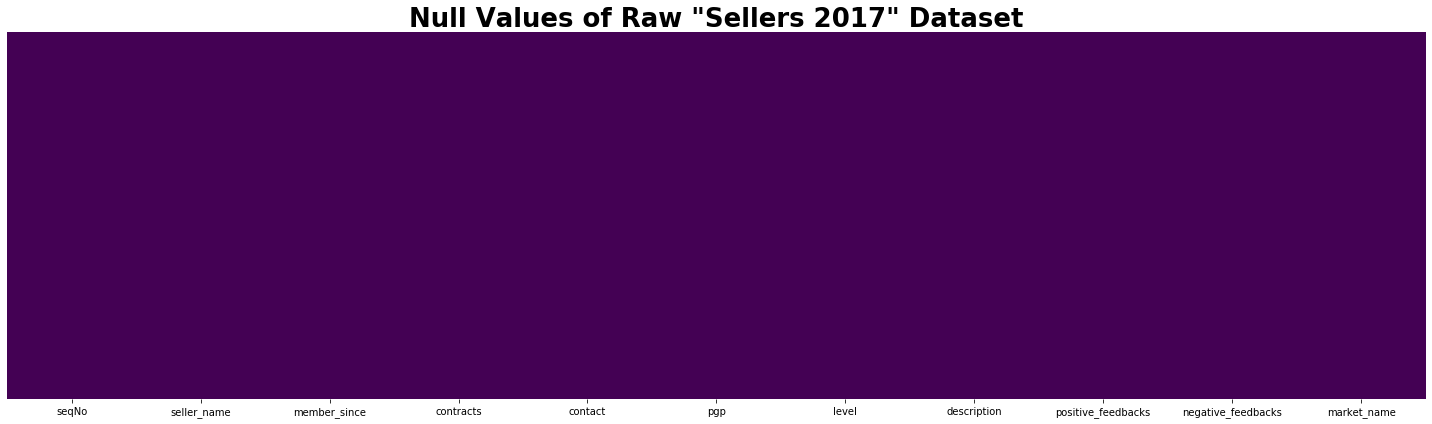

In [5]:
utils.plot_null_val_heatmap(sellers17, 'Null Values of Raw "Sellers 2017" Dataset', (20,6))

In [ ]:
cols_to_review = ['contracts', 'contact', 'level', 'negative_feedbacks', 'market_name']
for col in cols_to_review:
    print(sellers17[col].unique())
    
sellers17_v2 = sellers17.drop(cols_to_review, axis=1)

In [14]:
sellers17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2092 entries, 0 to 2091
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   seqNo               2092 non-null   int64 
 1   seller_name         2092 non-null   object
 2   member_since        2092 non-null   object
 3   contracts           2092 non-null   object
 4   contact             2092 non-null   object
 5   pgp                 2092 non-null   object
 6   level               2092 non-null   object
 7   description         2092 non-null   object
 8   positive_feedbacks  2092 non-null   object
 9   negative_feedbacks  2092 non-null   object
 10  market_name         2092 non-null   object
dtypes: int64(1), object(10)
memory usage: 179.9+ KB


## Cleaning 2017 Data

In [18]:
cols_to_review = ['contracts', 'contact', 'level', 'negative_feedbacks', 'market_name']
for col in cols_to_review:
    print(sellers17[col].unique())
    
sellers17_v2 = sellers17.drop(cols_to_review, axis=1)

['-']
['-']
['-']
['-']
['Dream']


In [24]:
sellers17_v2['feedback_cleaned'] = sellers17_v2['positive_feedbacks'].apply(lambda x: convert_str_to_float(x))

In [63]:
sellers17_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2092 entries, 0 to 2091
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   seqNo               2092 non-null   int64  
 1   seller_name         2092 non-null   object 
 2   member_since        2092 non-null   object 
 3   pgp                 2092 non-null   object 
 4   description         2092 non-null   object 
 5   positive_feedbacks  2092 non-null   object 
 6   feedback_cleaned    1978 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 114.5+ KB


---
## EDA

In [44]:
ratings16 = sellers16_v2['feedback_cleaned']
ratings17 = sellers17_v2['feedback_cleaned']

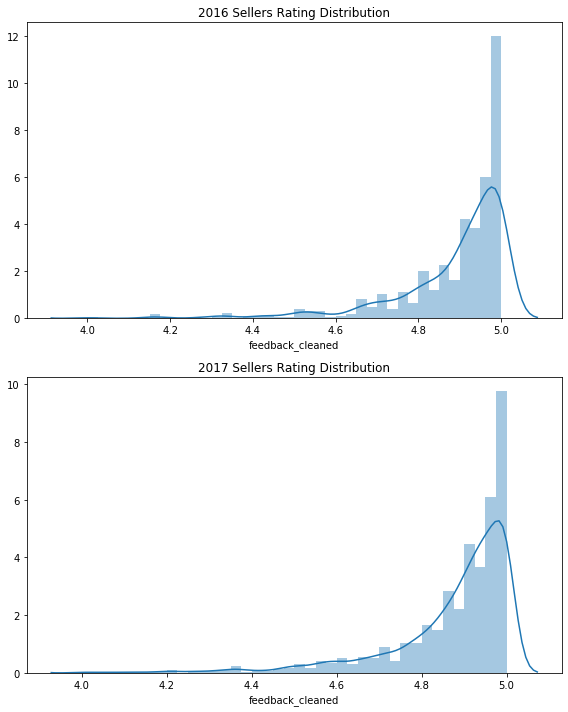

In [45]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

sns.distplot(ratings16, bins= 40, ax=ax1)
ax1.set_title('2016 Sellers Rating Distribution')

sns.distplot(ratings17, bins= 40, ax=ax2)
ax2.set_title('2017 Sellers Rating Distribution')

plt.tight_layout();

In [49]:
summary_titles = ['2016 Seller Ratings', '2017 Seller Ratings']
ratings_arr = [ratings16, ratings17]

for title, rating in zip (summary_titles, ratings_arr):
    print(title)
    print(utils.stats_summary(rating))
    print('\n')

2016 Seller Ratings
STATS SUMMARY:
Mean:  4.887202898550716
Median:  4.93
Std. Dev.:  0.14308797213943833
Max value:  5.0
Min value:  4.0
# of Obs.:  690
None


2017 Seller Ratings
STATS SUMMARY:
Mean:  4.873230535894822
Median:  4.92
Std. Dev.:  0.15112302062387659
Max value:  5.0
Min value:  4.0
# of Obs.:  2092
None




## Seller Overlap

In [50]:
unique_sellers16 = sellers16_v2['seller_name']
unique_sellers17 = sellers17_v2['seller_name']

In [51]:
print('# - Unique Sellers in 2016: ', len(unique_sellers16))
print('# - Unique Sellers in 2017: ', len(unique_sellers17))

# - Unique Sellers in 2016:  690
# - Unique Sellers in 2017:  2092


In [55]:
sellers_in_16_and_17 = pd.Series(list(set(unique_sellers16).intersection(set(unique_sellers17))))
print('# - Sellers in BOTH 2016 and 2017: ', len(sellers_in_16_and_17))

# - Sellers in BOTH 2016 and 2017:  299


In [56]:
sellers16_v2.columns

Index(['seqNo', 'seller_name', 'member_since', 'pgp', 'description',
       'positive_feedbacks', 'feedback_cleaned'],
      dtype='object')

In [67]:
sellers_intersect_df = pd.DataFrame()
sellers_intersect_df['name'] = sellers_in_16_and_17

cols_to_drop = ['seqNo', 'seller_name', 'member_since', 'pgp', 'description', 'feedback_cleaned']

# merge 2016
sellers_intersect_df = pd.merge(sellers_intersect_df, sellers16_v2, how='inner', left_on='name', right_on='seller_name')
sellers_intersect_df.drop(cols_to_drop, axis=1, inplace=True)
sellers_intersect_df.rename({'positive_feedbacks' : '2016_rating'}, axis=1, inplace=True)
sellers_intersect_df['2016_rating'] = sellers_intersect_df['2016_rating'].apply(lambda x: convert_str_to_float(x))

# merge 2017
sellers_intersect_df = pd.merge(sellers_intersect_df, sellers17_v2, how='inner', left_on='name', right_on='seller_name')
sellers_intersect_df.drop(cols_to_drop, axis=1, inplace=True)
sellers_intersect_df.rename({'positive_feedbacks' : '2017_rating'}, axis=1, inplace=True)
sellers_intersect_df['2017_rating'] = sellers_intersect_df['2017_rating'].apply(lambda x: convert_str_to_float(x))

# Add features
sellers_intersect_df['YoY_change'] = sellers_intersect_df['2017_rating'] - sellers_intersect_df['2016_rating']
sellers_intersect_df['YoY_change_prcnt'] = sellers_intersect_df['YoY_change'] / sellers_intersect_df['2016_rating']

In [68]:
sellers_intersect_df.head(10)

,name,2016_rating,2017_rating,YoY_change,YoY_change_prcnt
0,stealthmeds,4.96,4.96,0.00,0.000000
1,EU_384918J,4.96,4.94,-0.02,-0.004032
2,Bigdeal100,4.82,4.86,0.04,0.008299
3,HonestCocaine,5.00,4.89,-0.11,-0.022000
4,PaulSimon,5.00,4.99,-0.01,-0.002000
5,ash_williams,4.88,4.84,-0.04,-0.008197
6,factoryfloor,5.00,4.98,-0.02,-0.004000
7,flipkart,4.90,4.91,0.01,0.002041
8,onyx64,4.97,4.97,0.00,0.000000
9,Gandoffwhite,4.98,4.94,-0.04,-0.008032


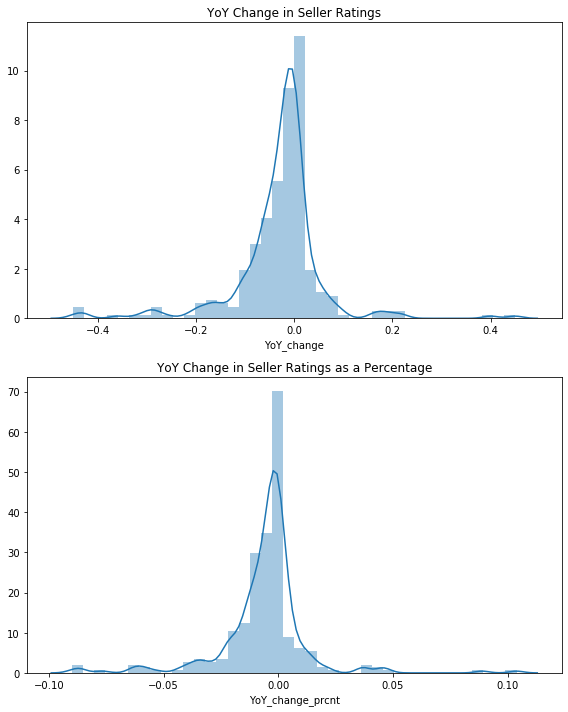

In [69]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

sns.distplot(sellers_intersect_df['YoY_change'], bins= 40, ax=ax1)
ax1.set_title('YoY Change in Seller Ratings')

sns.distplot(sellers_intersect_df['YoY_change_prcnt'], bins= 40, ax=ax2)
ax2.set_title('YoY Change in Seller Ratings as a Percentage')

plt.tight_layout();

In [73]:
venders_improved = sellers_intersect_df[sellers_intersect_df['YoY_change_prcnt'] > 0.01].sort_values(by='YoY_change_prcnt', ascending=False).copy()

print('# of Venders w/ YoY Change (%) > 1.0% :', venders_improved.shape[0])
print('\n')
venders_improved

# of Venders w/ YoY Change (%) > 1.0% : 22




,name,2016_rating,2017_rating,YoY_change,YoY_change_prcnt
135,Qualitywhitee,4.33,4.78,0.45,0.103926
66,lyso,4.50,4.90,0.40,0.088889
292,New_demension,4.66,4.88,0.22,0.047210
27,rivaldealer77,4.17,4.36,0.19,0.045564
187,Budness,4.71,4.92,0.21,0.044586
140,LegitVendor,4.80,4.98,0.18,0.037500
216,rxwholesale,4.33,4.49,0.16,0.036952
113,cheapestmotherfucker,4.67,4.84,0.17,0.036403
208,Kounterfeit_King,4.17,4.26,0.09,0.021583
29,undergroundcoco,4.69,4.79,0.10,0.021322
